In [252]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_line,geom_point,labs


In [253]:
df=pd.read_csv("/home/porny/Documents/dsc_rec/student_extended_ml_dataset2.csv")

In [254]:
df


,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group
0,Jason Vargas,19,Male,8.140821,92,87,43,85,True,High
1,Sandra Wiggins,35,Female,9.825626,112,86,81,54,False,High
2,Julia Olsen,33,Male,8.835372,131,87,52,57,True,High
3,Robert Pennington,33,Male,2.482483,138,70,86,83,False,Low
4,Kayla Sellers,28,Female,4.419793,90,95,48,83,True,Low
...,...,...,...,...,...,...,...,...,...,...
4995,Steven Lynch,30,Female,3.653474,143,93,59,85,True,Low
4996,Donna Hamilton,33,Female,1.096493,132,68,70,99,True,Low
4997,Mrs. Ashley Howard,38,Male,4.156770,111,76,96,71,False,Low
4998,Kendra Murray,18,Female,6.788548,137,81,98,73,False,High


In [255]:
df.head(5)

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group
0,Jason Vargas,19,Male,8.140821,92,87,43,85,True,High
1,Sandra Wiggins,35,Female,9.825626,112,86,81,54,False,High
2,Julia Olsen,33,Male,8.835372,131,87,52,57,True,High
3,Robert Pennington,33,Male,2.482483,138,70,86,83,False,Low
4,Kayla Sellers,28,Female,4.419793,90,95,48,83,True,Low


In [256]:
df.describe()

,Age,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,31.444800,5.499279,114.915200,70.311000,69.816000,69.798800
std,8.148388,2.588333,20.551839,17.753538,17.536626,17.487913
min,18.000000,1.002452,80.000000,40.000000,40.000000,40.000000
25%,24.000000,3.258910,97.000000,55.000000,54.000000,55.000000
50%,32.000000,5.474256,115.000000,71.000000,70.000000,70.000000
75%,38.000000,7.726088,133.000000,86.000000,85.000000,85.000000
max,45.000000,9.999925,150.000000,100.000000,100.000000,100.000000


In [257]:
df['Age'].unique()

array([19, 35, 33, 28, 32, 27, 39, 41, 43, 30, 38, 22, 45, 20, 23, 40, 29,
       26, 42, 25, 44, 36, 37, 31, 18, 34, 21, 24])

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5000 non-null   object 
 1   Age                5000 non-null   int64  
 2   Gender             5000 non-null   object 
 3   Hours_Studied      5000 non-null   float64
 4   IQ                 5000 non-null   int64  
 5   Physics_Marks      5000 non-null   int64  
 6   Math_Marks         5000 non-null   int64  
 7   Chemistry_Marks    5000 non-null   int64  
 8   Has_Part_Time_Job  5000 non-null   bool   
 9   Study_Hours_Group  5000 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(3)
memory usage: 356.6+ KB


In [259]:
age_count=df['Age'].value_counts()
age_count

Age
19    200
18    198
23    198
38    196
30    194
27    192
34    192
35    191
39    187
22    186
45    183
42    180
32    178
20    177
37    177
41    175
43    175
44    174
40    173
28    172
25    172
36    165
21    165
24    163
33    162
29    162
31    157
26    156
Name: count, dtype: int64

In [260]:
a=age_count.tolist()
a

[200,
 198,
 198,
 196,
 194,
 192,
 192,
 191,
 187,
 186,
 183,
 180,
 178,
 177,
 177,
 175,
 175,
 174,
 173,
 172,
 172,
 165,
 165,
 163,
 162,
 162,
 157,
 156]

In [261]:

x=df['Age'].unique()
x.tolist()

[19,
 35,
 33,
 28,
 32,
 27,
 39,
 41,
 43,
 30,
 38,
 22,
 45,
 20,
 23,
 40,
 29,
 26,
 42,
 25,
 44,
 36,
 37,
 31,
 18,
 34,
 21,
 24]

<BarContainer object of 28 artists>

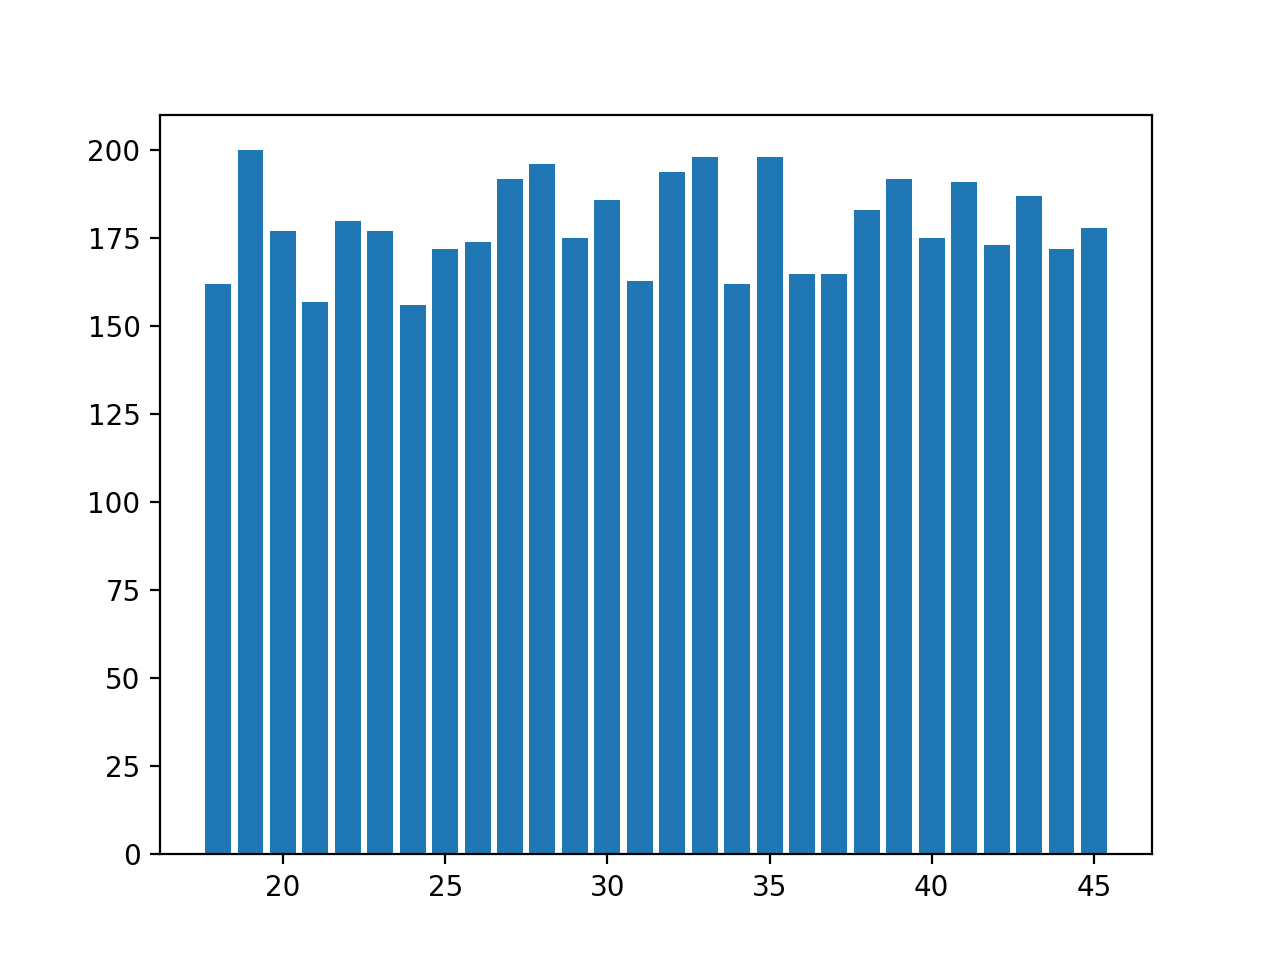

In [262]:
plt.bar(x,a)

In [263]:
df['Study_Hours_Group'].value_counts()

Study_Hours_Group
High    2763
Low     2237
Name: count, dtype: int64

In [264]:
df['Has_Part_Time_Job'].value_counts()

Has_Part_Time_Job
True     2525
False    2475
Name: count, dtype: int64

In [265]:
ptj=df.groupby('Has_Part_Time_Job')
ptj_true=ptj.get_group(True)

In [266]:
ptj_shg_true=ptj_true.groupby('Study_Hours_Group')
ptj_shg_true.first()

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job
Study_Hours_Group,,,,,,,,,
High,Jason Vargas,19,Male,8.140821,92,87,43,85,True
Low,Kayla Sellers,28,Female,4.419793,90,95,48,83,True


In [267]:
high_sw=ptj_shg_true.get_group('High')
high_sw

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group
0,Jason Vargas,19,Male,8.140821,92,87,43,85,True,High
2,Julia Olsen,33,Male,8.835372,131,87,52,57,True,High
6,Nancy Heath,27,Female,9.160331,141,83,52,69,True,High
12,Brittany Reed,38,Male,8.621854,140,81,91,66,True,High
13,Kimberly Johnson,22,Male,8.508133,121,72,54,42,True,High
...,...,...,...,...,...,...,...,...,...,...
4975,Kaitlyn Reyes,36,Male,7.969676,109,70,63,98,True,High
4977,Elizabeth Miranda,42,Female,7.814959,90,88,94,65,True,High
4979,Ivan Horne,31,Female,6.261608,94,51,78,96,True,High
4980,Dawn Carter,20,Male,9.531586,132,96,58,51,True,High


In [268]:
ptj_false=ptj.get_group(False)
ptj_false

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group
1,Sandra Wiggins,35,Female,9.825626,112,86,81,54,False,High
3,Robert Pennington,33,Male,2.482483,138,70,86,83,False,Low
5,Brenda James,32,Female,2.580537,141,69,66,59,False,Low
8,Lisa Joseph,39,Male,4.993183,112,98,45,78,False,Low
10,Jessica Hernandez,43,Female,9.146132,117,68,45,80,False,High
...,...,...,...,...,...,...,...,...,...,...
4989,Mark Davis,42,Male,1.071652,107,85,53,53,False,Low
4993,Lindsay Johnson,22,Male,1.669810,96,73,68,55,False,Low
4994,Wanda Cortez,20,Male,2.227528,144,85,95,44,False,Low
4997,Mrs. Ashley Howard,38,Male,4.156770,111,76,96,71,False,Low


In [269]:
ptj_shg_false=ptj_false.groupby('Study_Hours_Group')
ptj_shg_false.first()

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job
Study_Hours_Group,,,,,,,,,
High,Sandra Wiggins,35,Female,9.825626,112,86,81,54,False
Low,Robert Pennington,33,Male,2.482483,138,70,86,83,False


In [270]:
low_sw=ptj_shg_false.get_group('Low')
low_sw

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group
3,Robert Pennington,33,Male,2.482483,138,70,86,83,False,Low
5,Brenda James,32,Female,2.580537,141,69,66,59,False,Low
8,Lisa Joseph,39,Male,4.993183,112,98,45,78,False,Low
14,Jaclyn Wolfe,45,Male,4.201342,125,82,96,73,False,Low
15,Alexander Rodriguez,30,Female,4.956887,129,54,87,68,False,Low
...,...,...,...,...,...,...,...,...,...,...
4987,Nicholas Gomez,30,Female,4.059500,148,78,85,75,False,Low
4989,Mark Davis,42,Male,1.071652,107,85,53,53,False,Low
4993,Lindsay Johnson,22,Male,1.669810,96,73,68,55,False,Low
4994,Wanda Cortez,20,Male,2.227528,144,85,95,44,False,Low


In [271]:
hpj_lw=ptj_shg_true.get_group("Low")
hpj_lw

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group
4,Kayla Sellers,28,Female,4.419793,90,95,48,83,True,Low
7,Jose Herrera,27,Female,2.881403,139,74,67,61,True,Low
9,Wayne Lee,41,Male,1.365358,110,43,99,96,True,Low
11,Alyssa West,30,Male,4.176394,89,75,78,94,True,Low
42,Courtney Cook,33,Female,1.100412,114,60,46,100,True,Low
...,...,...,...,...,...,...,...,...,...,...
4991,Todd Johnson,25,Female,4.882151,96,66,83,42,True,Low
4992,Morgan Bradley,23,Male,2.695095,147,86,67,50,True,Low
4995,Steven Lynch,30,Female,3.653474,143,93,59,85,True,Low
4996,Donna Hamilton,33,Female,1.096493,132,68,70,99,True,Low


In [272]:
hw_npj=ptj_shg_false.get_group("High")
hw_npj

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group
1,Sandra Wiggins,35,Female,9.825626,112,86,81,54,False,High
10,Jessica Hernandez,43,Female,9.146132,117,68,45,80,False,High
16,Timothy Poole,20,Female,7.569855,119,100,77,57,False,High
17,James Doyle,23,Female,6.609207,139,92,90,70,False,High
18,Matthew Marsh,45,Male,6.091524,109,87,91,47,False,High
...,...,...,...,...,...,...,...,...,...,...
4982,Kelly Bentley MD,45,Female,8.552534,146,67,47,72,False,High
4984,Daniel Camacho,39,Female,9.933669,147,99,75,88,False,High
4986,Garrett Wright,26,Female,8.749779,105,92,64,55,False,High
4988,Brandon May,41,Male,6.382019,107,54,100,61,False,High


In [273]:
hw_npj.count()

Name                 1370
Age                  1370
Gender               1370
Hours_Studied        1370
IQ                   1370
Physics_Marks        1370
Math_Marks           1370
Chemistry_Marks      1370
Has_Part_Time_Job    1370
Study_Hours_Group    1370
dtype: int64

In [274]:
hpj_lw.count()

Name                 1132
Age                  1132
Gender               1132
Hours_Studied        1132
IQ                   1132
Physics_Marks        1132
Math_Marks           1132
Chemistry_Marks      1132
Has_Part_Time_Job    1132
Study_Hours_Group    1132
dtype: int64

In [275]:
low_sw.count()

Name                 1105
Age                  1105
Gender               1105
Hours_Studied        1105
IQ                   1105
Physics_Marks        1105
Math_Marks           1105
Chemistry_Marks      1105
Has_Part_Time_Job    1105
Study_Hours_Group    1105
dtype: int64

In [276]:
high_sw.count()

Name                 1393
Age                  1393
Gender               1393
Hours_Studied        1393
IQ                   1393
Physics_Marks        1393
Math_Marks           1393
Chemistry_Marks      1393
Has_Part_Time_Job    1393
Study_Hours_Group    1393
dtype: int64

(-1.1471829445229265,
 1.141927588393438,
 -1.1467815451507581,
 1.1424398495854662)

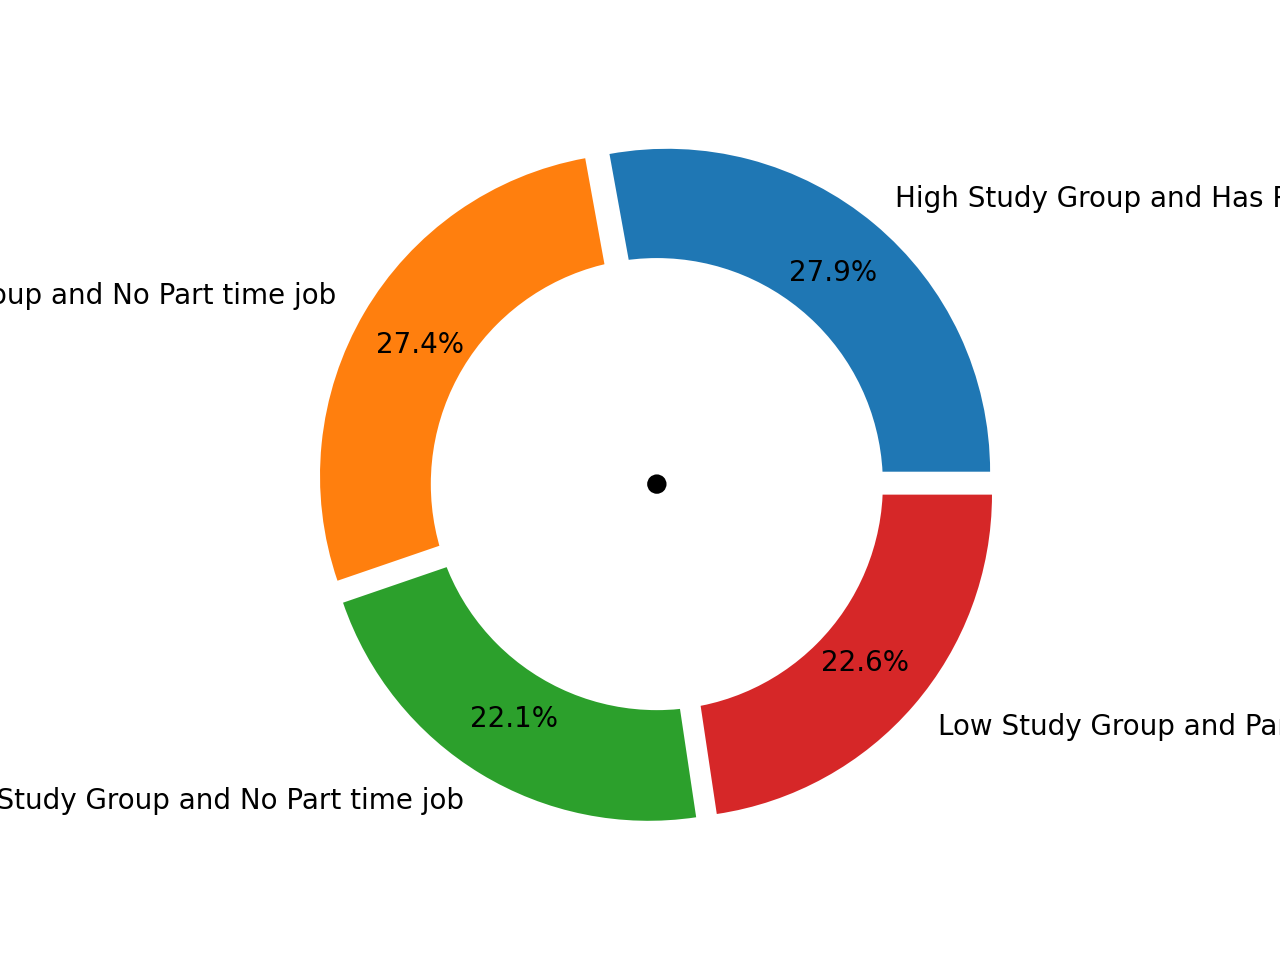

In [277]:
counts1=[1393,1370,1105,1132]
mylabels=["High Study Group and Has Part Time Job","High Study Group and No Part time job","Low Study Group and No Part time job","Low Study Group and Part time job"]
plt.pie(counts1,labels=mylabels,autopct='%1.1f%%',shadow=False,pctdistance=0.8, explode =(0.05,0.05,0.05,0.05))
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
centre_dot=plt.Circle((0,0),0.03,fc='black')
dot=plt.gcf()
fig.gca().add_artist(centre_dot)
plt.axis('equal')  


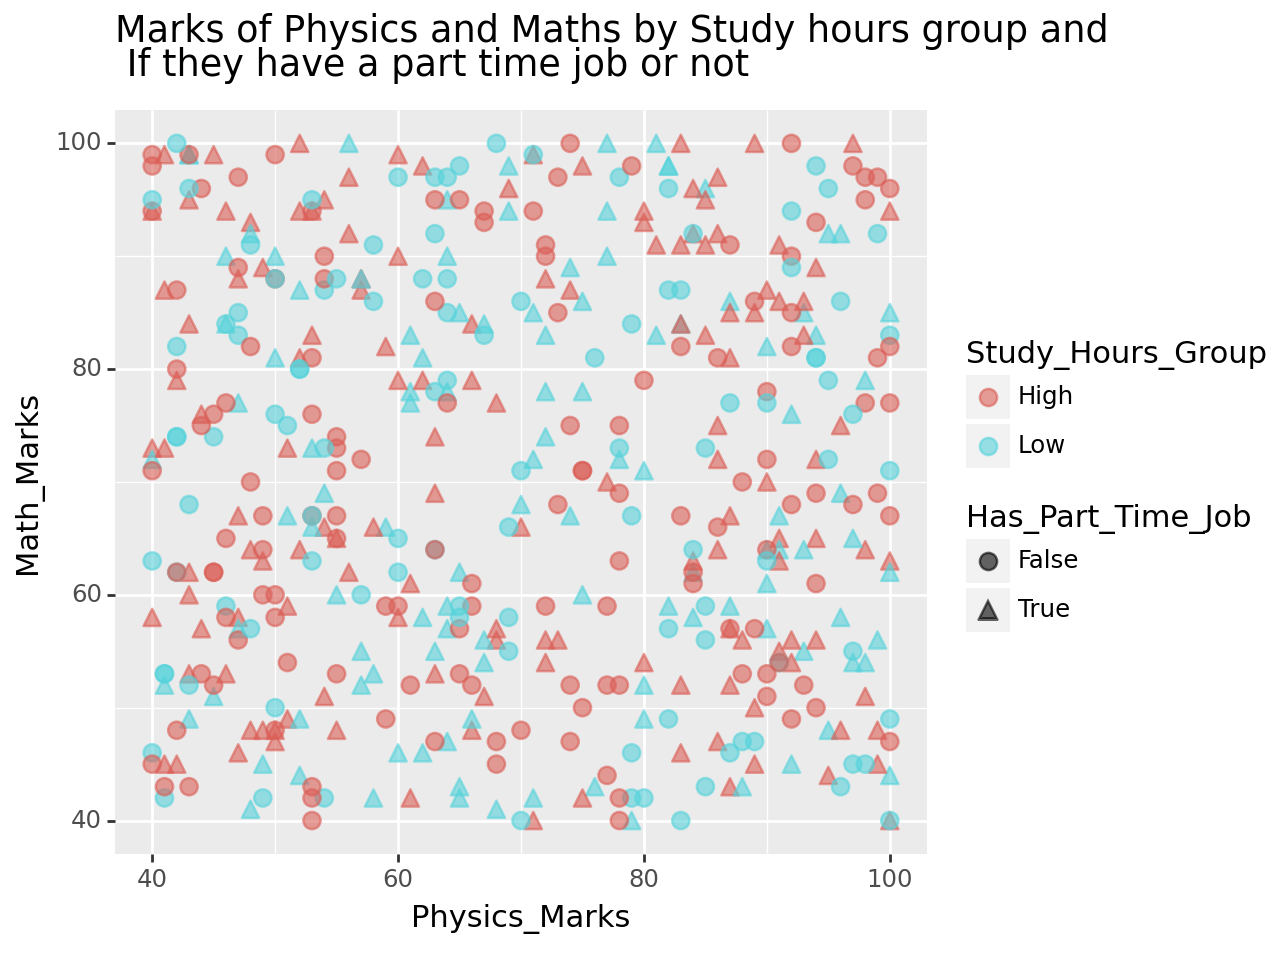

<Figure Size: (640 x 480)>

In [278]:
ggplot(df.head(500), aes(x ='Physics_Marks', y = 'Math_Marks', color = 'Study_Hours_Group', shape = 'Has_Part_Time_Job')) +geom_point(size = 3, alpha = .6) +labs(title = "Marks of Physics and Maths by Study hours group and \n If they have a part time job or not")

/home/porny/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight


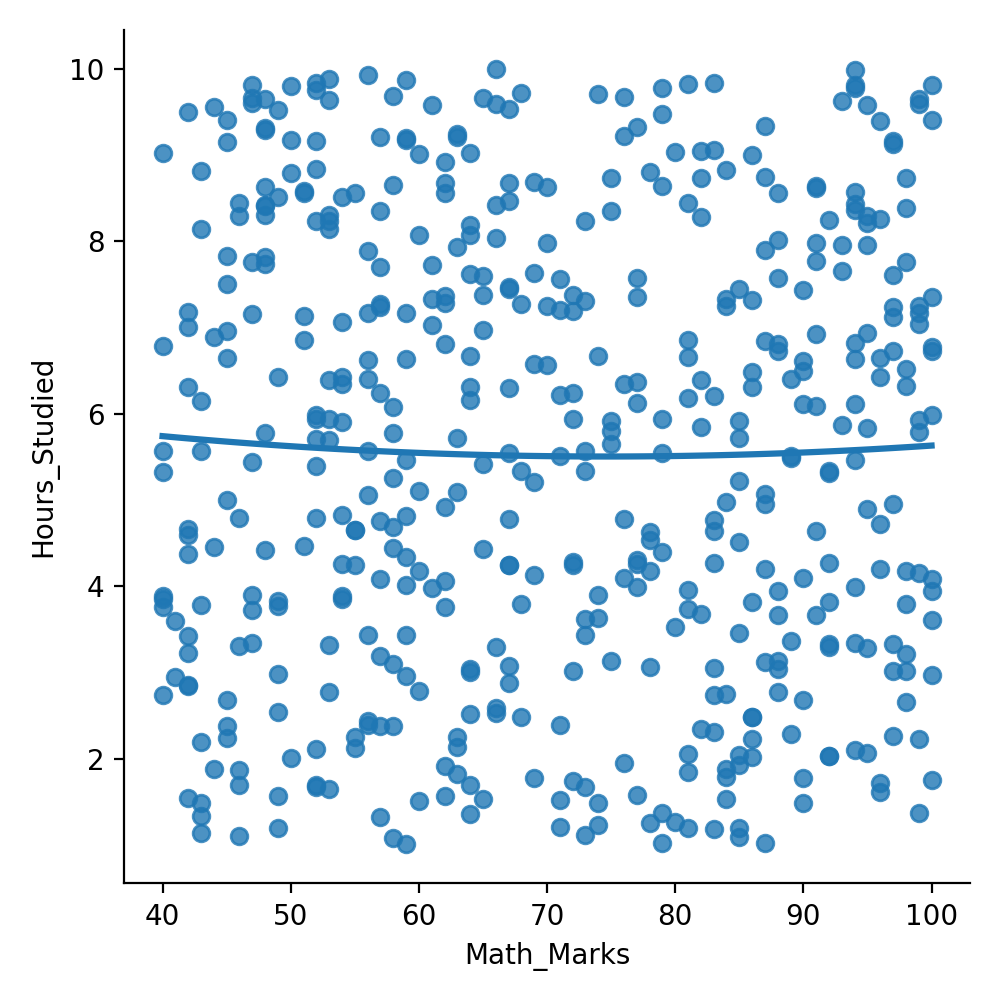

In [279]:
sns.lmplot(x ="Math_Marks", y ="Hours_Studied", data = df[['Hours_Studied','Math_Marks']].head(500), order = 2, ci = None)


In [280]:
df_train=df.copy()

In [281]:
df_train

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group
0,Jason Vargas,19,Male,8.140821,92,87,43,85,True,High
1,Sandra Wiggins,35,Female,9.825626,112,86,81,54,False,High
2,Julia Olsen,33,Male,8.835372,131,87,52,57,True,High
3,Robert Pennington,33,Male,2.482483,138,70,86,83,False,Low
4,Kayla Sellers,28,Female,4.419793,90,95,48,83,True,Low
...,...,...,...,...,...,...,...,...,...,...
4995,Steven Lynch,30,Female,3.653474,143,93,59,85,True,Low
4996,Donna Hamilton,33,Female,1.096493,132,68,70,99,True,Low
4997,Mrs. Ashley Howard,38,Male,4.156770,111,76,96,71,False,Low
4998,Kendra Murray,18,Female,6.788548,137,81,98,73,False,High


In [282]:
df_train

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group
0,Jason Vargas,19,Male,8.140821,92,87,43,85,True,High
1,Sandra Wiggins,35,Female,9.825626,112,86,81,54,False,High
2,Julia Olsen,33,Male,8.835372,131,87,52,57,True,High
3,Robert Pennington,33,Male,2.482483,138,70,86,83,False,Low
4,Kayla Sellers,28,Female,4.419793,90,95,48,83,True,Low
...,...,...,...,...,...,...,...,...,...,...
4995,Steven Lynch,30,Female,3.653474,143,93,59,85,True,Low
4996,Donna Hamilton,33,Female,1.096493,132,68,70,99,True,Low
4997,Mrs. Ashley Howard,38,Male,4.156770,111,76,96,71,False,Low
4998,Kendra Murray,18,Female,6.788548,137,81,98,73,False,High


In [283]:
y=df_train[['Physics_Marks','Math_Marks','Chemistry_Marks']]
y

,Physics_Marks,Math_Marks,Chemistry_Marks
0,87,43,85
1,86,81,54
2,87,52,57
3,70,86,83
4,95,48,83
...,...,...,...
4995,93,59,85
4996,68,70,99
4997,76,96,71
4998,81,98,73


In [295]:
df_train=df.drop(['Name','Age','Gender','Physics_Marks','Math_Marks','Chemistry_Marks','Study_Hours_Group'],axis=1)

In [296]:
y

,Physics_Marks,Math_Marks,Chemistry_Marks
0,87,43,85
1,86,81,54
2,87,52,57
3,70,86,83
4,95,48,83
...,...,...,...
4995,93,59,85
4996,68,70,99
4997,76,96,71
4998,81,98,73


In [297]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [298]:
x_train,x_test,y_train,y_test=train_test_split(df_train,y,test_size=0.2)
x_train

,Hours_Studied,IQ,Has_Part_Time_Job
2084,3.570887,103,False
4934,3.237876,102,True
2895,2.024277,146,True
445,9.667890,139,False
748,1.408828,101,True
...,...,...,...
4684,6.755125,121,False
230,8.417680,126,True
1379,9.888009,150,False
4216,5.125547,134,True


In [299]:
model=LinearRegression()

In [300]:
model.fit(x_train,y_train)

LinearRegression()

In [301]:
model.score(x_test,y_test)

-0.0014538094348612123

In [302]:
y_pred=model.predict(x_test)

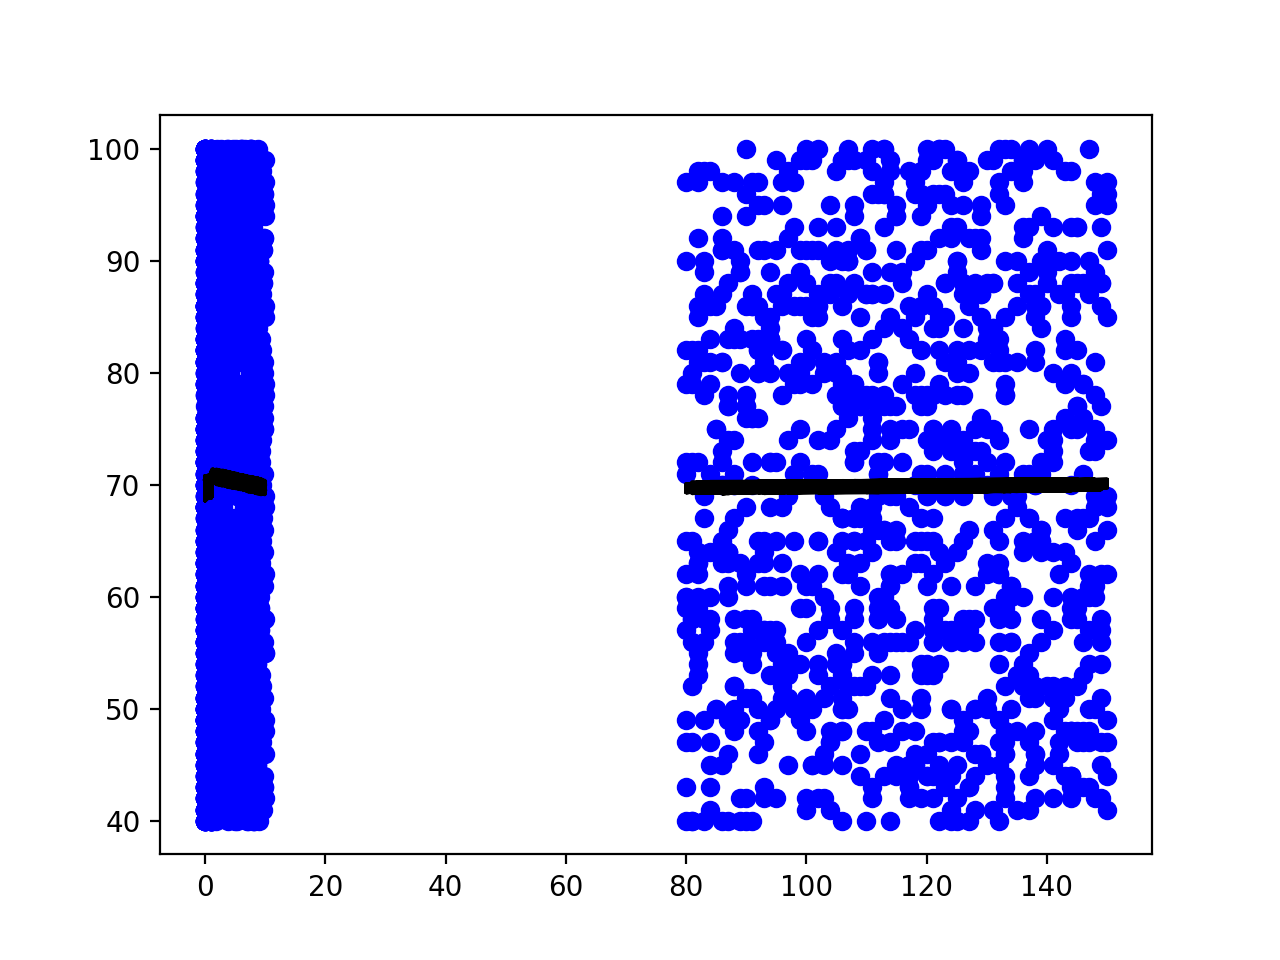

In [306]:

y_pred = model.predict(x_test)
plt.scatter(x_test, y_test, color ='b')
plt.plot(x_test, y_pred, color ='k')